In [66]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

In [68]:
conda install -c conda-forge xgboost

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda





Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\bartu\anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          11 KB  conda-forge
    conda-4.14.0               |   py39hcbf5309_0         1.0 MB  conda-forge
    libxgboost-1.5.0           |       hd77b12b_2         1.3 MB
    py-xgboost-1.5.0           |   py39haa95532_2         156 KB
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    xgboost-1.5.0              |   py39haa95532_2          15 KB
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  conda-forge/win-64::_py-xgboost-mutex-2.0-cpu_0
  libxgboost         pkgs/m

In [69]:
import xgboost as xgb

In [64]:
sales = pd.read_csv("sales.csv")
features = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")

In [3]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [7]:
le1 = LabelEncoder()
features['IsHoliday'] = le1.fit_transform(features['IsHoliday'])
le2 = LabelEncoder()
sales["IsHoliday"] = le2.fit_transform(sales["IsHoliday"])
le3 = LabelEncoder()
stores["Type"] = le3.fit_transform(stores["Type"])

In [8]:
sales = sales.drop(["IsHoliday"], axis = 1)

In [9]:
merged = features.merge(sales, how = 'left', on = ['Date', 'Store'])
merged = merged.merge(stores, how = "left", on = ["Store"])
merged.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,1.0,24924.50,0,151315
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,2.0,50605.27,0,151315
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,3.0,13740.12,0,151315
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,4.0,39954.04,0,151315
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5.0,32229.38,0,151315


In [10]:
merged["Date"] = pd.to_datetime(merged["Date"], format='%Y-%m-%d')

In [11]:
merged['Day'] = merged['Date'].dt.day
merged['Month'] = merged['Date'].dt.month
merged['Year'] = merged['Date'].dt.year

In [13]:

merged = merged.drop(["Date"],axis=1)
merged

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Day,Month,Year
0,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,1.0,24924.50,0,151315,5,2,2010
1,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,2.0,50605.27,0,151315,5,2,2010
2,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,3.0,13740.12,0,151315,5,2,2010
3,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,4.0,39954.04,0,151315,5,2,2010
4,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5.0,32229.38,0,151315,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423320,45,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,0,NaN,NaN,1,118221,28,6,2013
423321,45,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,0,NaN,NaN,1,118221,5,7,2013
423322,45,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,0,NaN,NaN,1,118221,12,7,2013
423323,45,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,0,NaN,NaN,1,118221,19,7,2013


In [38]:
y = merged["Weekly_Sales"]
x = merged.drop(["Weekly_Sales"],axis=1,inplace=False)
x_training,x_test,y_training,y_test = train_test_split(x, y)
x_training = x_training.fillna(x_training.mean()) 
x_test = x_test.fillna(x_training.mean())
y_training = y_training.fillna(y_training.mean()) 
y_test = y_test.fillna(y_training.mean())

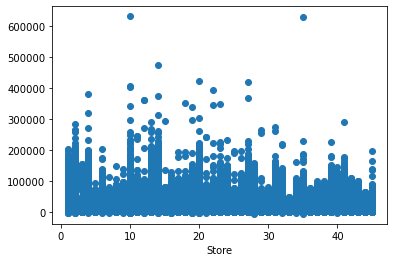

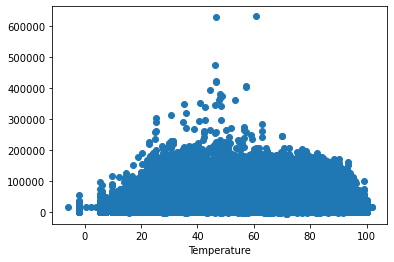

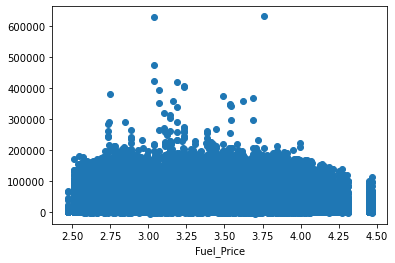

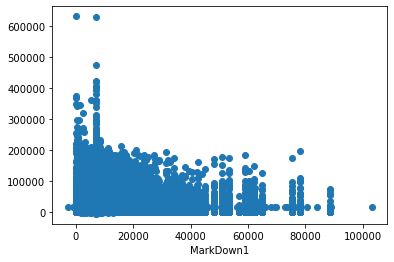

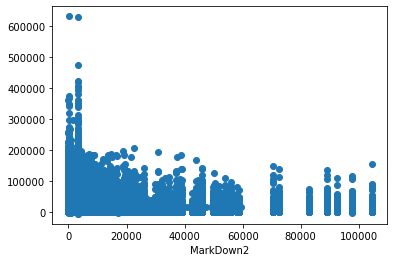

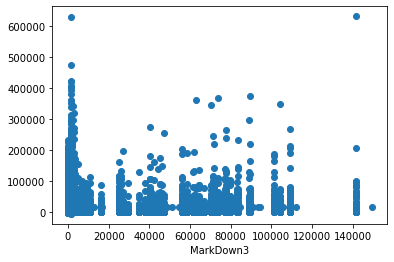

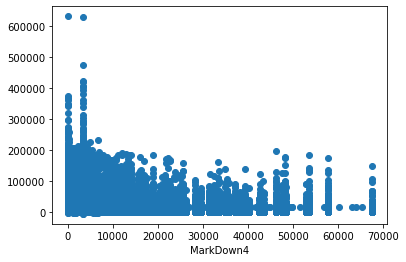

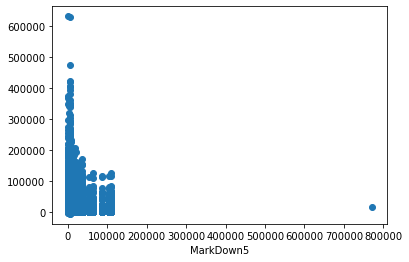

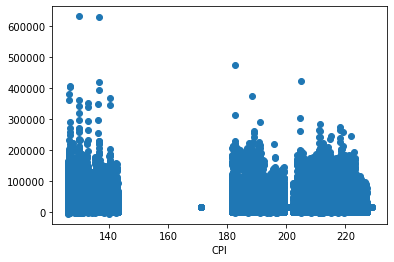

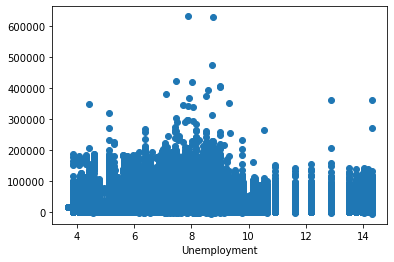

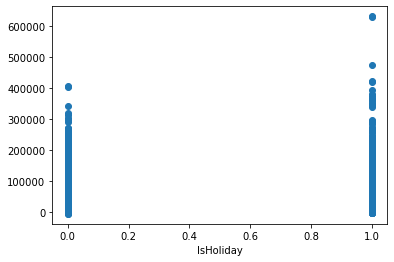

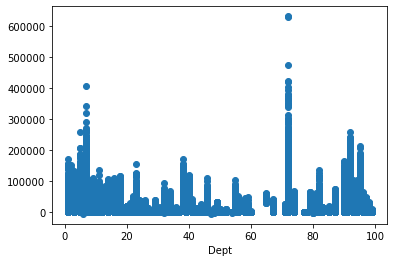

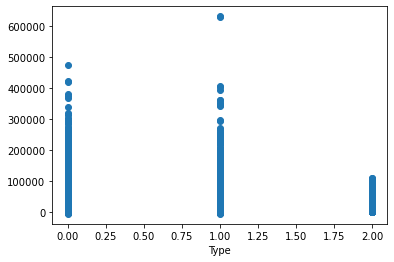

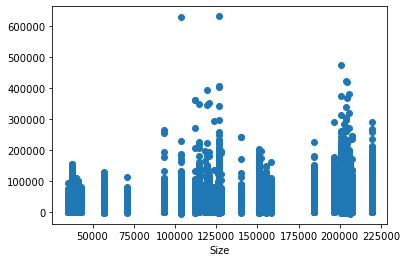

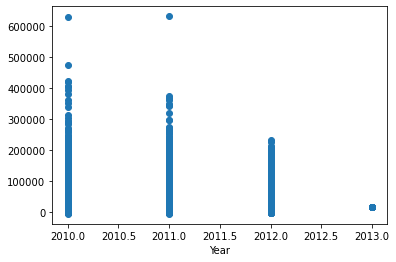

In [26]:
for i in ["Store","Temperature","Fuel_Price","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5","CPI","Unemployment","IsHoliday","Dept","Type","Size","Year"]:
    plt.scatter(x_training[i], y_training)
    plt.xlabel(i)
    plt.show()

In [28]:
reg =LinearRegression()
reg.fit(x_training, y_training)    
print('Score: {}'.format(reg.score(x_test, y_test)))

Score: 0.08810658819944583


In [39]:
scaler = StandardScaler().fit(x_training) 
x_scaled_training = scaler.transform(x_training)
x_scaled_test = scaler.transform(x_test)

In [58]:
random_forest = RandomForestRegressor()
random_forest.fit(x_scaled_training,y_training)
random_forest.score(x_scaled_test,y_test)

0.9711531118548283

In [71]:
from xgboost import XGBRegressor
xgboost = XGBRegressor()
xgboost.fit(x_scaled_training,y_training)
xgboost.score(x_scaled_test,y_test)

0.9354916609836958